Tugas Developer Student Clubs

*   Nama  : Jeremy Aditya
*   NIM   : 16520437
*   Universitas : Institut Teknologi Bandung
*   Mulai Pengerjaan : 14-11-2020
*   Sumber : Take Me Out



In [110]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import pickle
import matplotlib.pyplot as plt


In [111]:
#membaca data dari file.csv
df = pd.read_csv('/content/takemeout.csv')

In [112]:
df

,Timestamp,Siapa nama kamu?,Cewek atau cowok nih?,Seberapa penting quality time bareng calon pacar untuk kamu?,Seberapa penting physical touch sama calon pacar untuk kamu?,Seberapa penting word of affirmation dari calon pacar untuk kamu?,Seberapa penting dapet kado dari calon pacar untuk kamu?,Seberapa penting bantuan dari calon pacar untuk kamu?
0,2020/10/31 3:39:25 PM GMT+7,A**************,Cowok,5,5,4,1,3
1,2020/10/31 3:39:36 PM GMT+7,L****,Cewek,5,5,3,2,2
2,2020/10/31 3:39:38 PM GMT+7,Y***********,Cowok,4,3,4,4,4
3,2020/10/31 3:39:42 PM GMT+7,a***,Cowok,5,5,5,2,3
4,2020/10/31 3:39:43 PM GMT+7,B****,Cowok,5,5,5,2,4
...,...,...,...,...,...,...,...,...
96,2020/10/31 3:42:57 PM GMT+7,A********,Cowok,5,1,4,2,3
97,2020/10/31 3:43:02 PM GMT+7,K************,Cewek,4,5,4,4,3
98,2020/10/31 3:43:04 PM GMT+7,M*,Cowok,5,5,5,5,4
99,2020/10/31 3:43:11 PM GMT+7,K********************,Cowok,1,1,1,1,1


#Data Preparation

Membuang kolom waktu karena tidak relevan


In [113]:
df = df.iloc[:,1:]

Mengganti nama kolom

In [114]:
df.columns = ["Name", 'Gender', 'Quality Time', 'Physical Touch', 'Affirmative Words', 'Gifts', 'Helps']

In [115]:
df.head()

,Name,Gender,Quality Time,Physical Touch,Affirmative Words,Gifts,Helps
0,A**************,Cowok,5,5,4,1,3
1,L****,Cewek,5,5,3,2,2
2,Y***********,Cowok,4,3,4,4,4
3,a***,Cowok,5,5,5,2,3
4,B****,Cowok,5,5,5,2,4


Mengganti nilai 'Cowok' menjadi 0 dan 'Cewek' menjadi 1 untuk mempermudah pengolahan data

In [116]:
df['Gender'] = df['Gender'].apply(lambda x:0 if x == 'Cowok' else 1 )

In [117]:
df.head()

,Name,Gender,Quality Time,Physical Touch,Affirmative Words,Gifts,Helps
0,A**************,0,5,5,4,1,3
1,L****,1,5,5,3,2,2
2,Y***********,0,4,3,4,4,4
3,a***,0,5,5,5,2,3
4,B****,0,5,5,5,2,4


Membagi data menjadi data pria dan data wanita

In [118]:
m_df = df[df['Gender'] == 0]
f_df = df[df['Gender'] == 1]

In [119]:
m_df

,Name,Gender,Quality Time,Physical Touch,Affirmative Words,Gifts,Helps
0,A**************,0,5,5,4,1,3
2,Y***********,0,4,3,4,4,4
3,a***,0,5,5,5,2,3
4,B****,0,5,5,5,2,4
5,M*********,0,5,5,4,2,2
...,...,...,...,...,...,...,...
95,N****,0,5,4,4,4,5
96,A********,0,5,1,4,2,3
98,M*,0,5,5,5,5,4
99,K********************,0,1,1,1,1,1


Membuang kolom nama dan gender

In [120]:
m_x = m_df.drop(['Name', 'Gender'], axis=1)
f_x = f_df.drop(['Name', 'Gender'], axis=1)

In [121]:
m_x

,Quality Time,Physical Touch,Affirmative Words,Gifts,Helps
0,5,5,4,1,3
2,4,3,4,4,4
3,5,5,5,2,3
4,5,5,5,2,4
5,5,5,4,2,2
...,...,...,...,...,...
95,5,4,4,4,5
96,5,1,4,2,3
98,5,5,5,5,4
99,1,1,1,1,1


In [122]:
f_x

,Quality Time,Physical Touch,Affirmative Words,Gifts,Helps
1,5,5,3,2,2
19,5,5,5,5,5
20,4,2,3,1,3
23,5,2,4,5,4
25,3,2,3,1,5
27,3,3,3,3,3
33,4,2,2,2,5
46,1,1,1,1,1
47,4,1,3,1,5
49,5,3,4,4,5


#Model Development

In [123]:
m_nbrs = NearestNeighbors(n_neighbors=5).fit(m_x)
f_nbrs = NearestNeighbors(n_neighbors=5).fit(f_x)

Proses pengujian model


In [124]:
x = df.drop(['Name', 'Gender'], axis=1)

In [125]:
df.sample()

,Name,Gender,Quality Time,Physical Touch,Affirmative Words,Gifts,Helps
28,R****,0,5,3,3,2,3


In [126]:
test = x[df['Name'] == 'B***'].values

In [127]:
_, idx = f_nbrs.kneighbors(test)

In [128]:
idx

array([[ 3,  9, 14, 18, 12],
       [ 7, 10,  5, 13,  0]])

In [129]:
f_df.iloc[idx[0]]['Name']

23       B***
49     A*****
70    a******
93    F******
64         M*
Name: Name, dtype: object

In [130]:
f_df.iloc[idx[1]]['Name']

46    A********************
54                    H****
27                    v****
65                    w****
1                     L****
Name: Name, dtype: object

In [131]:
pickle.dump(m_nbrs,open('/content/m_model.pickle','wb'))
pickle.dump(f_nbrs,open('/content/f_model.pickle','wb'))

In [132]:
df.to_csv('/content/data.csv', index=False)

#Analisis Data

Data Pria

,Quality Time,Physical Touch,Affirmative Words,Gifts,Helps
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,4.185185,3.296296,3.827160,2.740741,3.765432
std,1.163090,1.269296,1.148805,1.301708,1.087102
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,2.000000,3.000000
50%,5.000000,3.000000,4.000000,3.000000,4.000000
75%,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


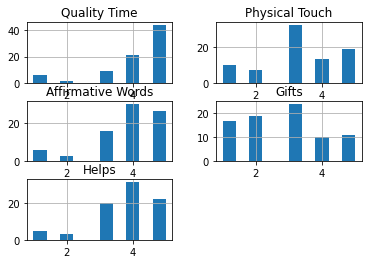

In [133]:
m_x.hist()
m_x.describe()

Data Wanita

,Quality Time,Physical Touch,Affirmative Words,Gifts,Helps
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.750000,2.650000,3.300000,2.700000,3.700000
std,1.371707,1.496487,1.380313,1.454575,1.380313
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,2.750000,1.000000,3.000000
50%,4.000000,2.000000,3.000000,3.000000,4.000000
75%,5.000000,4.000000,4.250000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


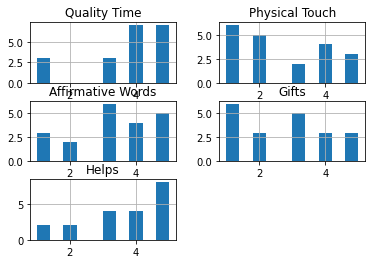

In [134]:
f_x.hist()
f_x.describe()

Analisa

Dari tabel diatas, dapat kita simpulkan bahwa dari 101 data, 81% adalah laki-laki dan 19% adalah perempuan. Lalu, secara rata-rata, pria lebih mementingkan quality time, physical touch, dan affirmative words daripada wanita. Secara garis besar, hasil yang di dapatkan dari wanita dan pria hampir sama. Perbedaan yang cukup mencolok terdapat di physical touch. Mayoritas wanita menaruh physical touch di point 1 yaitu tidak lah penting. Hal ini cukup berbeda dengan pria dimana mayoritas menganggap physical touch di point 3 yaitu biasa saja yang berarti secara umum, pria lebih menganggap physical touch sebagai hal yang penting dari pada wanita.